In [1]:
%load_ext autoreload
%autoreload 2

(<Figure size 640x480 with 1 Axes>, <Axes: >)

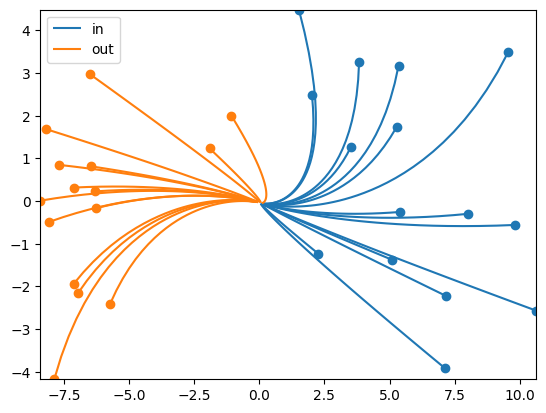

In [8]:
from dynadojo.systems.lds import LDSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

latent_dim = 2
embed_dim = 3
n = 5000
timesteps = 50
system = SystemChecker(LDSystem(latent_dim, embed_dim, noise_scale=0))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

2023-12-29 11:50:19.153878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
125/125 [==============================] - 2s 7ms/step - loss: 1.3882 - val_loss: 1.1348
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 1.0246 - val_loss: 0.9157
Epoch 3/20
125/125 [==============================] - 1s 4ms/step - loss: 0.8200 - val_loss: 0.7296
Epoch 4/20
125/125 [==============================] - 1s 4ms/step - loss: 0.6541 - val_loss: 0.5838
Epoch 5/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5260 - val_loss: 0.4723
Epoch 6/20
125/125 [==============================] - 1s 4ms/step - loss: 0.4284 - val_loss: 0.3876
Epoch 7/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3541 - val_loss: 0.3231
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2976 - val_loss: 0.2739
Epoch 9/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2543 - val_loss: 0.2362
Epoch 10/20
125/125 [==============================] - 1s 4ms/step - loss: 0.2212 - val_loss: 0.2073

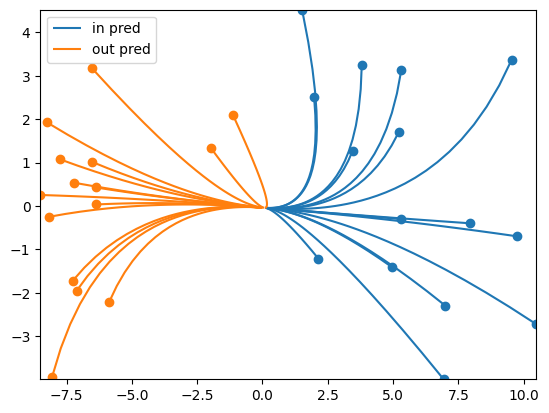

In [9]:
from dynadojo.baselines.dnn import DNN

linear_model = DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=20, verbose='auto')
x_pred = linear_model.predict(x[:, 0], timesteps)
y_pred = linear_model.predict(y[:, 0], timesteps)
plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

Epoch 1/20
125/125 [==============================] - 2s 7ms/step - loss: 1.5011 - val_loss: 1.0338
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 0.8315 - val_loss: 0.6631
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.5507 - val_loss: 0.4581
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 0.3981 - val_loss: 0.3486
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.3158 - val_loss: 0.2893
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 0.2703 - val_loss: 0.2553
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2442 - val_loss: 0.2354
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.2283 - val_loss: 0.2234
Epoch 9/20
125/125 [==============================] - 1s 6ms/step - loss: 0.2182 - val_loss: 0.2151
Epoch 10/20
125/125 [==============================] - 1s 6ms/step - loss: 0.2114 - val_loss: 0.2091

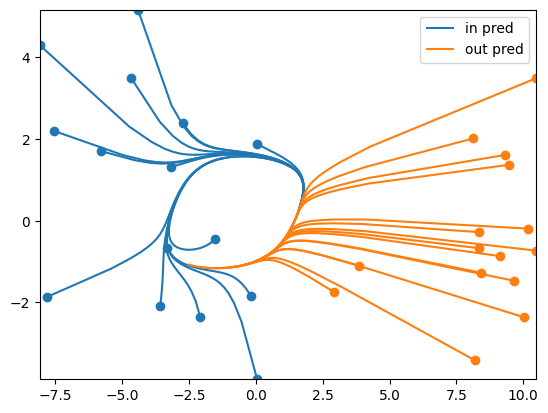

In [10]:
nonlinear_model = DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=20, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], timesteps)
y_pred = nonlinear_model.predict(y[:, 0], timesteps)
plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")